In [1]:
import keras
import tensorflow
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
import pandas as pd
import os

list_classes = []

#listing all the image classes available , which are the names of the different folders containing images 

for root , dirs , files in os.walk(r'E:\Code\AnimalClassifierCNN\AnimalClassifier\images'):
    
    for folder in dirs:
        
        list_classes.append(folder)
        
print(list_classes)

#creating a dict assigning an individual number to each class 
class_dict = dict()

for i in range(len(list_classes)):
    
    class_dict[list_classes[i]] = i 


Using TensorFlow backend.


['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


In [2]:
import os
import glob
import cv2


#loading all the images in all the folders

def load_data(img_path , classes):
    
    x = []
    y = []
    
    for img_type in classes:
        
        path = os.path.join(img_path , img_type)
        
        for i in os.listdir(path):
            
            file_path = os.path.join(path , i)
            img = image.imread(file_path)
            img_resized = cv2.resize(img , (100,100))
            img_resized = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
            x.append(img_resized)
            y.append(class_dict[img_type])
            
    return x , y 



X , Y = load_data('images' , list_classes)


#print(X[0])

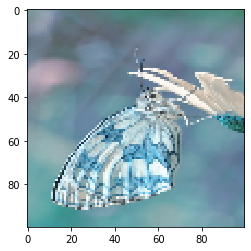

In [3]:
x_copy = X.copy()
y_copy = Y.copy()

plt.imshow(x_copy[0])
plt.show()

In [4]:
#function to get the name of the class 

from keras.utils import to_categorical

def get_class_name(class_num):
    
    for c in class_dict.keys():
        
        if class_dict[c] == class_num:
            
            return c

x = np.array(x_copy)
x = (x * 255).astype(np.uint8)
y = np.array(y_copy)

y = to_categorical(y)


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


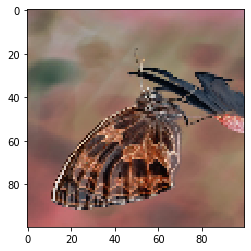

In [5]:
plt.imshow(x[0])
print(y[0])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


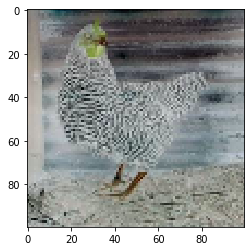

In [6]:
#test and train data split

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.33)

plt.imshow(x_train[0])
print(y_train[0])

In [7]:
datagen = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

#datagen.fit(x_train)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D , Dense , Flatten , Dropout , MaxPooling2D

batch_size = 50

model = Sequential()
model.add(Conv2D(128 , kernel_size = 10 ,strides = [2,2] , input_shape = ( 100 , 100 , 3) ,activation='relu'))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(Conv2D(64 , kernel_size = 5  , strides = [2,2] , activation='relu'))
model.add(MaxPooling2D(pool_size = [2,2]))
model.add(Dropout(0.3))
model.add(Conv2D(32 , kernel_size = 3 , activation = 'relu'))
model.add(Flatten())
model.add(Dense(128 , activation = 'tanh'))
model.add(Dropout(0.3))
model.add(Dense(64 , activation = 'relu'))
model.add(Dropout(0.3)) 
model.add(Dense(10 , activation = 'softmax'))

W0414 03:20:56.440338  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0414 03:20:56.685196  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0414 03:20:56.752220  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0414 03:20:56.820235  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0414 03:20:56.822227  8388 deprecation_wrapper.py:119] Fro

In [ ]:
from keras import optimizers

optimizer = optimizers.SGD(lr = 0.1)

model.compile(optimizer=optimizer , loss = 'categorical_crossentropy',
             metrics=['accuracy'])
train_history = model.fit(x_train , y_train , validation_data = (x_test , y_test),
epochs = 500 ,batch_size = 32)

W0414 03:20:56.950256  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0414 03:20:56.955257  8388 deprecation_wrapper.py:119] From f:\program files (x86)\python\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0414 03:20:57.090287  8388 deprecation.py:323] From f:\program files (x86)\python\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 17539 samples, validate on 8640 samples
Epoch 1/500
17539/17539 [==============================] - 31s 2ms/step - loss: 2.2345 - acc: 0.1760 - val_loss: 2.2002 - val_acc: 0.1903
Epoch 2/500
17539/17539 [==============================] - 17s 970us/step - loss: 2.2173 - acc: 0.1879 - val_loss: 2.2017 - val_acc: 0.1799
Epoch 3/500
17539/17539 [==============================] - 17s 967us/step - loss: 2.2081 - acc: 0.1925 - val_loss: 2.2006 - val_acc: 0.1903
Epoch 4/500
17539/17539 [==============================] - 17s 966us/step - loss: 2.2055 - acc: 0.1925 - val_loss: 2.1936 - val_acc: 0.1966
Epoch 5/500
17539/17539 [==============================] - 17s 941us/step - loss: 2.2055 - acc: 0.1900 - val_loss: 2.1990 - val_acc: 0.1832
Epoch 6/500
17539/17539 [==============================] - 16s 936us/step - loss: 2.2041 - acc: 0.1939 - val_loss: 2.1956 - val_acc: 0.2001
Epoch 7/500
17539/17539 [==============================] - 16s 934us/step - loss: 2.2045 - acc: 0.1975 - val_loss

Epoch 59/500
17539/17539 [==============================] - 16s 932us/step - loss: 2.2100 - acc: 0.1862 - val_loss: 2.2038 - val_acc: 0.1925
Epoch 60/500
17539/17539 [==============================] - 16s 931us/step - loss: 2.2082 - acc: 0.1863 - val_loss: 2.2029 - val_acc: 0.1911
Epoch 61/500
17539/17539 [==============================] - 16s 930us/step - loss: 2.2066 - acc: 0.1929 - val_loss: 2.2009 - val_acc: 0.1810
Epoch 62/500
17539/17539 [==============================] - 16s 930us/step - loss: 2.2059 - acc: 0.1920 - val_loss: 2.1994 - val_acc: 0.1978
Epoch 63/500
17539/17539 [==============================] - 16s 929us/step - loss: 2.2057 - acc: 0.1926 - val_loss: 2.1997 - val_acc: 0.1961
Epoch 64/500
17539/17539 [==============================] - 16s 931us/step - loss: 2.2043 - acc: 0.1884 - val_loss: 2.1994 - val_acc: 0.1933
Epoch 65/500
17539/17539 [==============================] - 16s 933us/step - loss: 2.2025 - acc: 0.1919 - val_loss: 2.1994 - val_acc: 0.1859
Epoch 66/500


In [ ]:
plt.style.use('ggplot')

fig , ax = plt.subplots(2,figsize=(20,10))

ax[0].plot(train_history.history['acc'])
ax[0].set_ylabel('accuracy')
ax[1].plot(train_history.history['loss'],'g')
ax[1].set_ylabel('loss')
plt.xlabel('epochs')
plt.show()

In [ ]:
def get_prediction(image_to_predict , model):
    
    prediction = model.predict(image_to_predict)[0]
    
    max_prob = 0
    max_index = 0
    
    for i in range(len(prediction)):
        
        if prediction[i] > max_prob:
            
            max_prob = prediction[i]
            max_index = i
            
    
    print("prediction is: {}".format(get_class_name(max_index)))
            
            
        

In [ ]:

test_sample= x_test[2]
test_sample = np.array([test_sample])

prediction = model.predict(test_sample)

print(prediction,y_test[2])
plt.imshow(x_test[2])
plt.show()

get_prediction(test_sample, model)



In [ ]:
get_prediction(x_test[0] , model)